# Zuber

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

**Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.**

**Descripción de los datos**

Una base de datos con información sobre viajes en taxi en Chicago:

1. tabla neighborhoods: datos sobre los barrios de la ciudad
- name: nombre del barrio
- neighborhood_id: código del barrio
2. tabla cabs: datos sobre los taxis
- cab_id: código del vehículo
- vehicle_id: ID técnico del vehículo
- company_name: la empresa propietaria del vehículo
3. tabla trips: datos sobre los viajes
- trip_id: código del viaje
- cab_id: código del vehículo que opera el viaje
- start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
- end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
- duration_seconds: duración del viaje en segundos
- distance_miles: distancia del viaje en millas
- pickup_location_id: código del barrio de recogida
- dropoff_location_id: código del barrio de finalización
4. tabla weather_records: datos sobre el clima
- record_id: código del registro meteorológico
- ts: fecha y hora del registro (tiempo redondeado a la hora)
- temperature: temperatura cuando se tomó el registro
- description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"



##  Paso 1

Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
URL='https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)   
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


## Paso 2. Análisis exploratorio de datos (sql)

1. Encuentra el número de viajes en taxi para cada empresa de taxis del 15 al 16 de noviembre de 2017. Nombra el campo resultante trips_amount y muéstralo junto con el campo company_name. Ordena los resultados por el campo trips_amount en orden descendente.

2. Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

3. En noviembre de 2017 las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Nombra el campo con nombres de empresas de taxis company. Ordena el resultado en orden descendente por trips_amount.

## Paso 3. Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

1. Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

2. Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: "Bad" si el campo description contiene las palabras "rain" o "storm" y "Good" para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

3. Recupera de la tabla trips todos los viajes que comenzaron en el Loop (neighborhood_id: 50) y finalizaron en O'Hare (neighborhood_id: 63) un sábado. Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje.
Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Con esos datos se creó un dataset con la siguente información:


1. project_sql_result_01.csv. Contiene los siguientes datos:
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
2. project_sql_result_04.csv. Contiene los siguientes datos:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.b

## Paso 4. Para estos dos datasets ahora necesitas:

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

### Importar los archivos

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
df_company = pd.read_csv('./datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('./datasets/project_sql_result_04.csv')
df_trips = pd.read_csv('./datasets/project_sql_result_07.csv')

 ### Estudiar los datos que contienen

In [4]:
# mostrar información del DataFrame
def info(df):
    display(df.head(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print('Duplicated: ',df.duplicated().sum())
    print()
    print('Null values:')
    print(df.isnull().sum())

In [5]:
info(df_company)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Duplicated:  0

Null values:
company_name    0
trips_amount    0
dtype: int64


In [6]:
info(df_dropoff)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

Duplicated:  0

Null values:
dropoff_location_name    0
average_trips            0
dtype: int64


### Asegurar que los tipos de datos sean correctos

In [7]:
df_dropoff['average_trips'] = df_dropoff['average_trips'].round().astype('int')
df_dropoff

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,2


In [8]:
info(df_trips)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000

Duplicated:  197

Null values:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [9]:
df_trips[df_trips.duplicated()].head(10)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
125,2017-11-11 08:00:00,Good,1380.0
126,2017-11-11 09:00:00,Good,1380.0
130,2017-11-11 10:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
190,2017-11-04 08:00:00,Good,1323.0


In [10]:
df_trips.query('start_ts == "2017-11-11 06:00:00" & weather_conditions == "Good" & duration_seconds == 1260')

,start_ts,weather_conditions,duration_seconds
43,2017-11-11 06:00:00,Good,1260.0
62,2017-11-11 06:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
250,2017-11-11 06:00:00,Good,1260.0
333,2017-11-11 06:00:00,Good,1260.0
343,2017-11-11 06:00:00,Good,1260.0
725,2017-11-11 06:00:00,Good,1260.0
948,2017-11-11 06:00:00,Good,1260.0


In [11]:
df_trips.drop_duplicates(keep='first'.format('trip_id'), inplace=True)

In [12]:
df_trips.duplicated().sum()

0

In [13]:
df_trips = df_trips.query('duration_seconds != 0')

In [14]:
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'], format='%Y-%m-%d %H:%M:%S')
df_trips

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1059,2017-11-11 10:00:00,Good,1303.0
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1064,2017-11-11 10:00:00,Good,1318.0


<div class="alert alert-block alert-info">
<b>
    
Conclusiones 1

1. `df_company` no hay valores ausentes ni duplicados
2. `df_dropoff` no hay valores ausentes ni duplicadla. 'average_trips' tiene muchas cifras significativas por lo que es mejor redondearlo 
3 `df_weather` 
    
    3.1 no hay valores ausentes.
    
    3.2 si duplicados no se encontro alguna razon para eliminarlos todos, por lo que solo se guardo un solo valor por cada duplicado, 
    
    3.3 valores con 0 duración de tiempo se eliminaron
    
    3.4 la fecha se cambió a formato datetime
</b> <a class="tocSkip"></a>
</div>


###  Identificar los 10 principales barrios
###  Hacer gráficos: empresas de taxis y número de viajes,

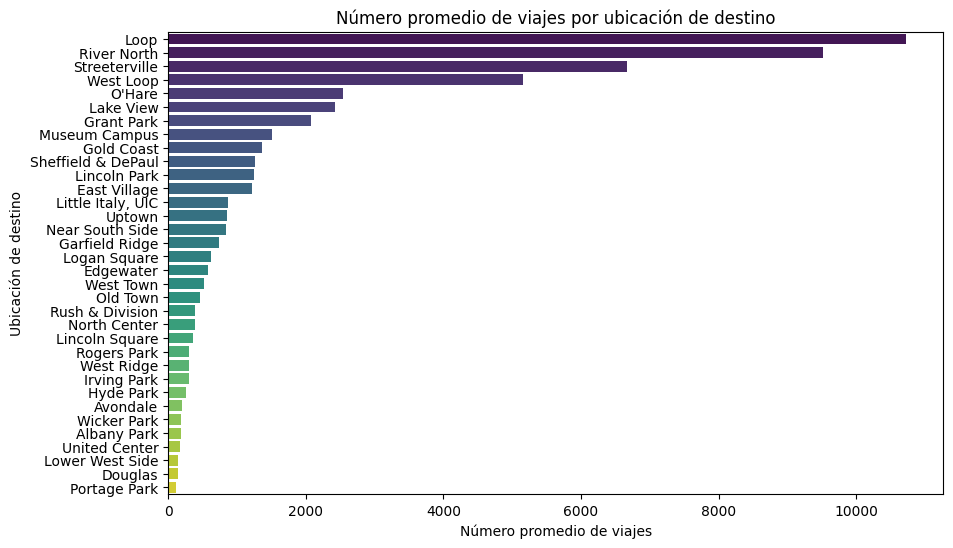

In [15]:
avg_location = df_dropoff.groupby('dropoff_location_name').agg({'average_trips':'sum'}).sort_values(by='average_trips', ascending=False).query('average_trips > 100')
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_location['average_trips'], y=avg_location.index,  palette='viridis')
plt.title('Número promedio de viajes por ubicación de destino')
plt.xlabel('Número promedio de viajes')
plt.ylabel('Ubicación de destino')
plt.show()

In [16]:
print('Top 10 destinos')
avg_location.head(10)

Top 10 destinos


,average_trips
dropoff_location_name,
Loop,10727
River North,9524
Streeterville,6665
West Loop,5164
O'Hare,2547
Lake View,2421
Grant Park,2069
Museum Campus,1510
Gold Coast,1364


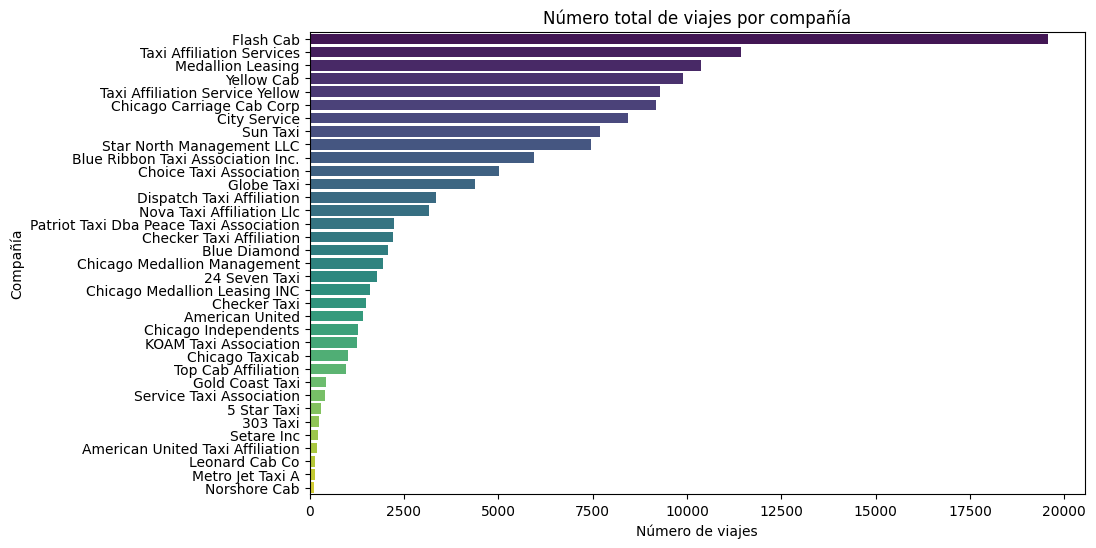

In [17]:
company_trips = df_company.groupby('company_name').agg({'trips_amount':'sum'}).sort_values(by='trips_amount', ascending=False).query('trips_amount > 100')
plt.figure(figsize=(10, 6))
sns.barplot(x=company_trips['trips_amount'], y=company_trips.index, palette='viridis')
plt.title('Número total de viajes por compañía')
plt.xlabel('Número de viajes')
plt.ylabel('Compañía')
plt.show()

In [18]:
print('Top 10 compañias')
company_trips.head(10)

Top 10 compañias


,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


<div class="alert alert-block alert-info">
<b>
    
Conclusiones 2: Las compañias con más viajes y los destinos mas solicitados son:

        
        Destinos              Compañias 
    
        Loop                     Flash Cab
        River North              Taxi Affiliation Services
        Streeterville            Medallion Leasin	
        West Loop	            Yellow Cab
        O'Hare	               Taxi Affiliation Service Yellow
        Lake View                Chicago Carriage Cab Corp	
        Grant Park               City Service
        Museum Campus            Sun Taxi	
        Gold Coast	           Star North Management LLC
        Sheffield & DePaul       Blue Ribbon Taxi Association Inc.	
     
        
</b> <a class="tocSkip"></a>
</div>

## Paso 5. Prueba de hipótesis (Python)


Prueba la hipótesis:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [19]:
df_trips.groupby('weather_conditions')['weather_conditions'].count()

weather_conditions
Bad     148
Good    717
Name: weather_conditions, dtype: int64

In [20]:
df_trips.groupby('weather_conditions')['duration_seconds'].mean()

weather_conditions
Bad     2409.229730
Good    2049.259414
Name: duration_seconds, dtype: float64

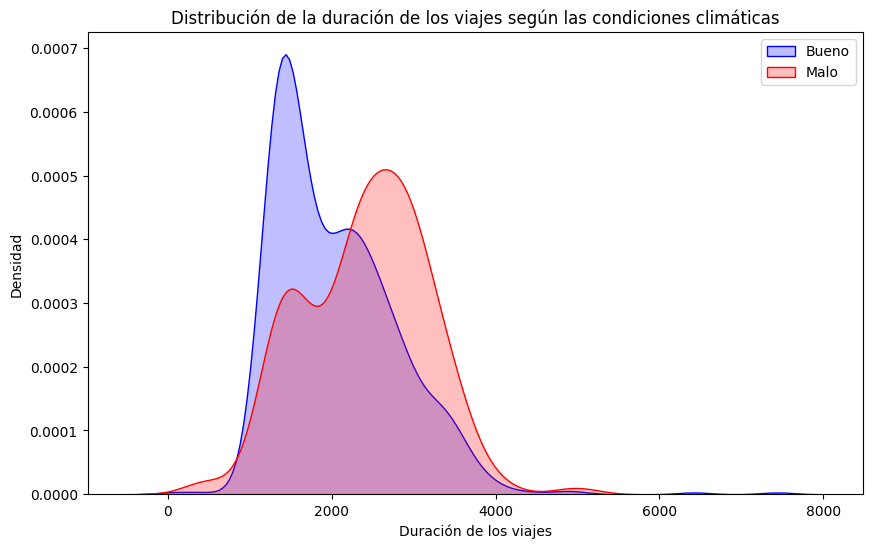

In [21]:
good = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']
bad = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']
plt.figure(figsize=(10, 6))
sns.kdeplot(good, shade=True, color='b', label='Bueno')
sns.kdeplot(bad, shade=True, color='r', label='Malo')
plt.title('Distribución de la duración de los viajes según las condiciones climáticas')
plt.xlabel('Duración de los viajes')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [22]:
print('Good:', np.var(good))
print('Bad:', np.var(bad))

Good: 567538.2925368953
Bad: 561003.0958728999


<div class="alert alert-block alert-info">
<b>
  
Varianza similar -> podemos utilizar p-value
        
</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo en mostrar los supuestos de varianzas iguales. En futuras ocasiones para mostrar este supuesto puedes hacer uso de la prueba de levene.  Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(rainy_saturday_trips['duration_seconds'], non_rainy_saturday_trips ['duration_seconds'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene. </div>

In [23]:
alpha = 0.05
    
results = stats.ttest_ind(good, bad, equal_var=True)

print('pvalue:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazar la hipótesis nula")
else:
    print("No rechazar la hipótesis nula") 

pvalue: 1.5394237752380357e-07
Rechazar la hipótesis nula


<div class="alert alert-block alert-info">
<b>
    
Conclusiones 3: 

  
La duración de viajes los sábados con mal tiempo es mayor que la de los sabados con buen clima. 
        
</b> <a class="tocSkip"></a>
</div>